# Week 4 Homework: Visualization

One last assignment! This week you have only one homework question to turn in, but you are encouraged to work on a project and apply what you've learned to it.

## Question 1

Load the MovieData.csv file (one last time...) and:

a) Create a scatter-plot with Movie Budgets as the X axis, and Profit Margin (Total Revenue / Budget) as the Y axis. Resize the Y axis as needed to convey the most information.

b) Create two time series: one a count of movies released by month-year (Jan-1990, Feb-1990, etc.), the other those movies' average profitability. Plot both series either in two aligned subplots or in a single subplot with a secondary axis.

## Solution

First, load the data. You should be a pro at this by now!

In [1]:
import matplotlib.pyplot as plt
import pandas
import datetime as dt

In [2]:
%matplotlib inline

In [3]:
def make_date(date_str):
    '''
    Turn a MM/DD/YY string into a datetime object
    '''
    m, d, y = date_str.split("/")
    m = int(m)
    d = int(d)
    y = int(y)
    if y > 13:
        y += 1900
    else:
        y += 2000
    return dt.datetime(y, m, d)

In [4]:
movies = pandas.read_csv("MovieData.csv", sep='\t', 
                         na_values=["Unknown", "Unkno"], parse_dates=[0], date_parser=make_date)

In [5]:
# Replace missing values with 0
movies.fillna(0, inplace=True)

In [6]:
movies["Worldwide Gross"][movies["Worldwide Gross"]==0] = movies["US Gross"]

//anaconda/envs/data/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### a)

First, calculate the profits for each movie by adding together US and Worldwide Gross and dividing by budget

In [7]:
movies["Profit"] = movies["Worldwide Gross"] /  movies["Budget"]

To create the scatter-plot, first create a new figure. Add a single subplot, and use  *.scatter(...)* to create the actual scatterplot. And don't forget to label the axes!

(0, 5)

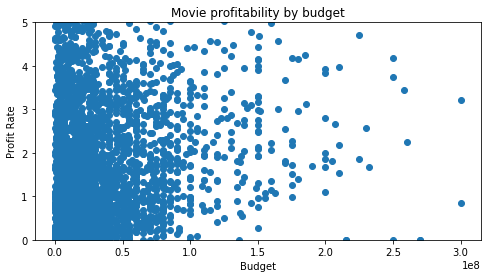

In [8]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.set_title("Movie profitability by budget")
ax.set_xlabel("Budget")
ax.set_ylabel("Profit Rate")
ax.scatter(movies.Budget, movies.Profit)
ax.set_ylim(0, 5)

### b)

Before we can plot the time series, we need to create them. First create a column that will store a datetime object with the first day of each movie's release month.

In [9]:
movies["Month"] = movies.Release_Date.apply(lambda x: dt.datetime(year=x.year, month=x.month, day=1))

Next, group by month to create the two time series. To get the monthly count, just use *len* to find the number of movies in each monthly group; for the profits, call *.mean()* on the Profit column to calculate the average profit of each group. Since you're grouping on a datetime object, pandas knows to treat the data as a time series.

In [10]:
monthly_count = movies.groupby("Month")["Movie"].aggregate(len)

In [11]:
monthly_profit = movies.groupby("Month")["Profit"].mean()

To make the series easier to plot together, we can combine them into a single DataFrame. Since the series have the same indices (the datetime objects), pandas will automatically know to put the counts and profits for each month in the same rows.

In [12]:
monthly_df = pandas.DataFrame({"Count": monthly_count, "Mean_Profit": monthly_profit})

Now all that's left to do is to plot. Create a figure and subplot, and use *.scatter(...)* to make a scatter-plot of profits. Then plot the count series, either by creating a secondary y axis by hand, or (easier) just using the pandas DataFrame's built-in *.plot(...)* method with the *secondary_y* argument. Once again, label the axes, and you're all set!

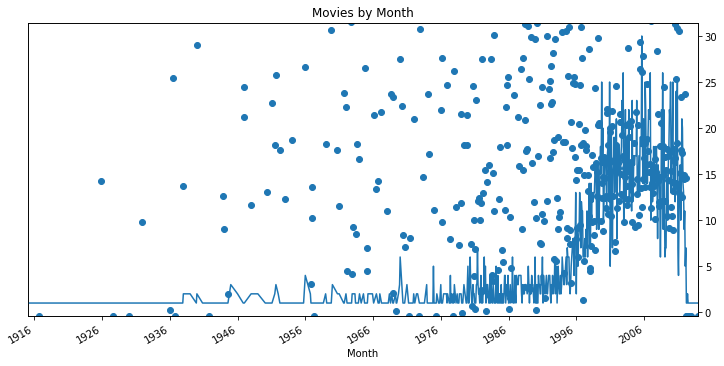

In [13]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
ax.set_title("Movies by Month")
ax.set_ylabel("Count")
ax.scatter(monthly_profit.index, monthly_profit)
ax.set_ylim(0,5)
monthly_count.plot(ax=ax, secondary_y=True)